<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.831739,54.088410,56.940707,153.082259,372.943116,329.070412,43.872704
1,0.0,1.0,92.368432,54.417595,80.930925,-643.089605,-405.372653,-68.289687,-337.082967
2,0.0,2.0,40.873277,34.966290,50.540075,-210.730283,-74.350641,285.948667,-360.299308
3,0.0,3.0,80.080872,87.470134,68.635057,383.666487,629.852549,-59.969507,689.822056
4,0.0,4.0,38.946210,24.154879,60.392864,21.566955,155.060908,170.330453,-15.269545
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.608643,64.033531,94.964032,-181.332360,40.273845,-438.665689,478.939534
29996,999.0,26.0,84.055700,93.484229,44.001586,-472.381672,-240.840157,203.750101,-444.590258
29997,999.0,27.0,59.240935,56.288646,89.370058,-213.578453,1.321185,-308.324012,309.645197
29998,999.0,28.0,86.201728,28.363611,68.616905,-178.577625,14.604619,189.878393,-175.273774


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.831739,54.088410,56.940707,153.082259,372.943116,329.070412,43.872704
1,0.0,1.0,92.368432,54.417595,80.930925,-643.089605,-405.372653,-68.289687,-337.082967
2,0.0,2.0,40.873277,34.966290,50.540075,-210.730283,-74.350641,285.948667,-360.299308
3,0.0,3.0,80.080872,87.470134,68.635057,383.666487,629.852549,-59.969507,689.822056
4,0.0,4.0,38.946210,24.154879,60.392864,21.566955,155.060908,170.330453,-15.269545
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.608643,64.033531,94.964032,-181.332360,40.273845,-438.665689,478.939534
29996,999.0,26.0,84.055700,93.484229,44.001586,-472.381672,-240.840157,203.750101,-444.590258
29997,999.0,27.0,59.240935,56.288646,89.370058,-213.578453,1.321185,-308.324012,309.645197
29998,999.0,28.0,86.201728,28.363611,68.616905,-178.577625,14.604619,189.878393,-175.273774


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    98.831739  54.088410  ...  329.070412   43.872704
      1.0    92.368432  54.417595  ...  -68.289687 -337.082967
      2.0    40.873277  34.966290  ...  285.948667 -360.299308
      3.0    80.080872  87.470134  ...  -59.969507  689.822056
      4.0    38.946210  24.154879  ...  170.330453  -15.269545
...                ...        ...  ...         ...         ...
999.0 25.0   52.608643  64.033531  ... -438.665689  478.939534
      26.0   84.055700  93.484229  ...  203.750101 -444.590258
      27.0   59.240935  56.288646  ... -308.324012  309.645197
      28.0   86.201728  28.363611  ...  189.878393 -175.273774
      29.0   79.839104  95.154603  ... -250.846338 -803.109664

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    98.831739  54.088410  ...  329.070412   43.872704
      1.0    92.368432  54.417595  ...  -68.289687 -337.082967
      2.0    40.873277  34.966290  ...  285.948667 -360.299308
      3.0    80.080872  87.470134  ...  -59.969507  689.822056
      4.0    38.946210  24.154879  ...  170.330453  -15.269545
...                ...        ...  ...         ...         ...
999.0 25.0   52.608643  64.033531  ... -438.665689  478.939534
      26.0   84.055700  93.484229  ...  203.750101 -444.590258
      27.0   59.240935  56.288646  ... -308.324012  309.645197
      28.0   86.201728  28.363611  ...  189.878393 -175.273774
      29.0   79.839104  95.154603  ... -250.846338 -803.109664

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.831739,54.088410,56.940707,153.082259,372.943116,329.070412,43.872704
1,0.0,1.0,92.368432,54.417595,80.930925,-643.089605,-405.372653,-68.289687,-337.082967
2,0.0,2.0,40.873277,34.966290,50.540075,-210.730283,-74.350641,285.948667,-360.299308
3,0.0,3.0,80.080872,87.470134,68.635057,383.666487,629.852549,-59.969507,689.822056
4,0.0,4.0,38.946210,24.154879,60.392864,21.566955,155.060908,170.330453,-15.269545
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.608643,64.033531,94.964032,-181.332360,40.273845,-438.665689,478.939534
29996,999.0,26.0,84.055700,93.484229,44.001586,-472.381672,-240.840157,203.750101,-444.590258
29997,999.0,27.0,59.240935,56.288646,89.370058,-213.578453,1.321185,-308.324012,309.645197
29998,999.0,28.0,86.201728,28.363611,68.616905,-178.577625,14.604619,189.878393,-175.273774


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    98.831739  54.088410  ...  329.070412   43.872704
      1.0    92.368432  54.417595  ...  -68.289687 -337.082967
      2.0    40.873277  34.966290  ...  285.948667 -360.299308
      3.0    80.080872  87.470134  ...  -59.969507  689.822056
      4.0    38.946210  24.154879  ...  170.330453  -15.269545
...                ...        ...  ...         ...         ...
999.0 25.0   52.608643  64.033531  ... -438.665689  478.939534
      26.0   84.055700  93.484229  ...  203.750101 -444.590258
      27.0   59.240935  56.288646  ... -308.324012  309.645197
      28.0   86.201728  28.363611  ...  189.878393 -175.273774
      29.0   79.839104  95.154603  ... -250.846338 -803.109664

[30000 rows x 7 columns]

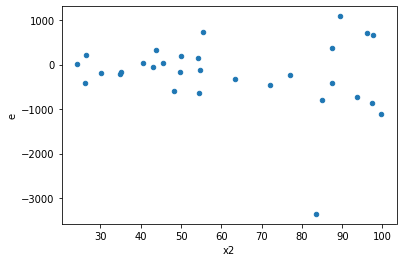

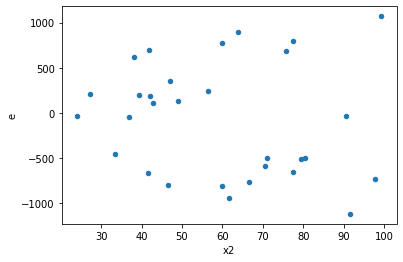

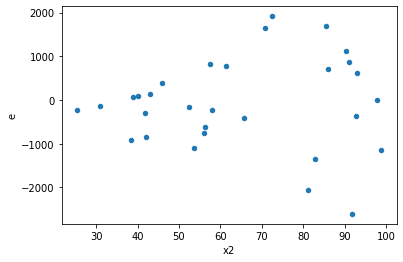

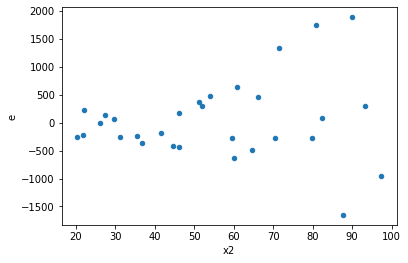

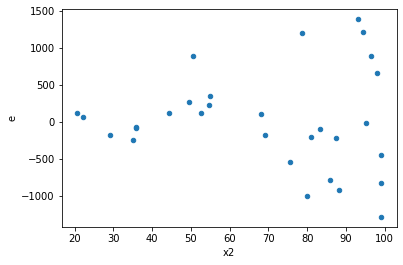

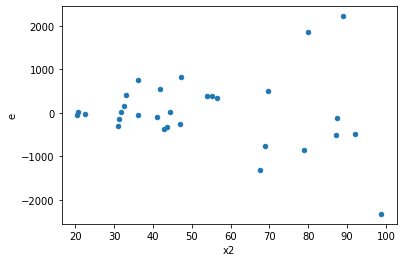

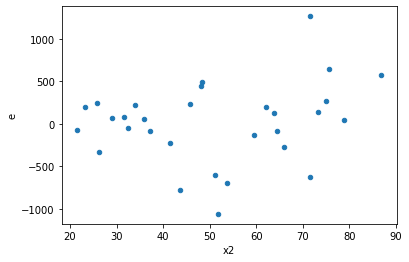

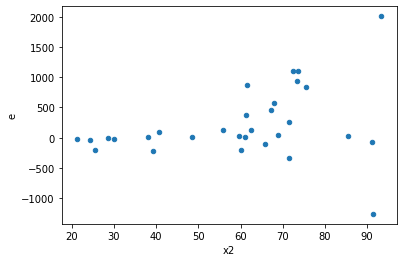

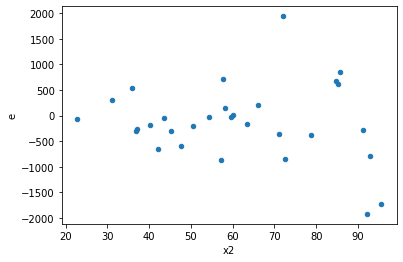

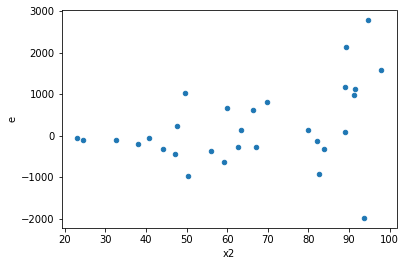

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,361176.78595530684,9803992.296962705,40130.753995034094,1089332.4774403004,27.144580377809444,3.5891208441052314e-05,0.9999820543957795,1.7945604220526157e-05,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,2039002.1403895135,4279246.482268413,226555.7933766126,475471.83136315696,2.098696415027275,0.28466096225260484,0.8576695188736976,0.14233048112630242,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,1832717.5005541723,20688257.363123335,203635.2778393525,2298695.2625692594,11.288295854035153,0.0013029752221929147,0.9993485123889035,0.0006514876110964574,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,475220.74681781855,12051939.577141296,52802.30520197984,1339104.397460144,25.360718482607723,4.785006277896464e-05,0.9999760749686105,2.392503138948232e-05,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,531428.9925301909,5545162.890175468,59047.66583668787,616129.2100194965,10.434438030515327,0.0017685588852065504,0.9991157205573967,0.0008842794426032752,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,795379.481037682,16494713.821673917,88375.49789307578,1832745.9801859907,20.73816865397922,0.00011125782003951201,0.9999443710899802,5.5628910019756006e-05,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,576144.0036932791,1917076.315487222,64016.000410364344,213008.47949858021,3.3274256144264465,0.08791502210125413,0.9560424889493729,0.04395751105062706,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,114206.46778507224,5621195.306310947,12689.607531674694,624577.2562567719,49.2195881312922,2.774404421979071e-06,0.999998612797789,1.3872022109895354e-06,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1073595.7726888426,6257532.706117167,119288.41918764918,695281.4117907963,5.8285742784223595,0.014955065075691776,0.9925224674621541,0.007477532537845888,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,361176.78595530684,9803992.296962705,40130.753995034094,1089332.4774403004,27.144580377809444,3.5891208441052314e-05,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,2039002.1403895135,4279246.482268413,226555.7933766126,475471.83136315696,2.098696415027275,0.28466096225260484,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,1832717.5005541723,20688257.363123335,203635.2778393525,2298695.2625692594,11.288295854035153,0.0013029752221929147,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,475220.74681781855,12051939.577141296,52802.30520197984,1339104.397460144,25.360718482607723,4.785006277896464e-05,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,531428.9925301909,5545162.890175468,59047.66583668787,616129.2100194965,10.434438030515327,0.0017685588852065504,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,795379.481037682,16494713.821673917,88375.49789307578,1832745.9801859907,20.73816865397922,0.00011125782003951201,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,576144.0036932791,1917076.315487222,64016.000410364344,213008.47949858021,3.3274256144264465,0.08791502210125413,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,114206.46778507224,5621195.306310947,12689.607531674694,624577.2562567719,49.2195881312922,2.774404421979071e-06,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1073595.7726888426,6257532.706117167,119288.41918764918,695281.4117907963,5.8285742784223595,0.014955065075691776,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    761
Reject001=1 : Homoscedasticity      239
Name: Result_test, dtype: int64